In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
    .config("spark.driver.memory", "8g")\
    .getOrCreate()

spark

22/05/09 11:08:15 WARN Utils: Your hostname, HOMELAB resolves to a loopback address: 127.0.1.1; using 172.19.230.246 instead (on interface eth0)
22/05/09 11:08:15 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/05/09 11:08:17 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/05/09 11:08:18 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pandas as pd
import pyspark.sql.functions as F
import pyspark.sql.types as T

from cycler import cycler
from pyspark.sql.functions import col, lit

from common import *

plt.rc('axes', labelsize=15, titlesize=15) 
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)

In [42]:
PREFIX = "main/tpcc"
IGNORE_CACHE = True

index_df = from_cache_or_compute(
    f'{PREFIX}/index.parquet',
    lambda: get_index(spark, PREFIX)\
        .withColumn("sample", col("sample").cast(T.IntegerType()))\
        .toPandas(),
    ignore_cache=IGNORE_CACHE,
)

index_df

Saved to: main/tpcc/index.parquet


,prefix,version,config_name,duration,txns,clients,rate,sample,wl:name,wl:sh_only,wl:mix,wl:mh_zipf,wl:homes,wl:sp_partition
0,file:/home/ctring/data/detock/main/tpcc/baseli...,1.0.1012,baseline.conf,30,0,100,0,10,tpcc,0,45:43:4:4:4,1,2,-1
1,file:/home/ctring/data/detock/main/tpcc/baseli...,1.0.1012,baseline.conf,30,0,125,0,10,tpcc,0,45:43:4:4:4,1,2,-1
2,file:/home/ctring/data/detock/main/tpcc/baseli...,1.0.1012,baseline.conf,30,0,150,0,10,tpcc,0,45:43:4:4:4,1,2,-1
3,file:/home/ctring/data/detock/main/tpcc/baseli...,1.0.1012,baseline.conf,30,0,175,0,10,tpcc,0,45:43:4:4:4,1,2,-1
4,file:/home/ctring/data/detock/main/tpcc/baseli...,1.0.1012,baseline.conf,30,0,200,0,10,tpcc,0,45:43:4:4:4,1,2,-1
5,file:/home/ctring/data/detock/main/tpcc/baseli...,1.0.1012,baseline.conf,30,0,225,0,10,tpcc,0,45:43:4:4:4,1,2,-1
6,file:/home/ctring/data/detock/main/tpcc/baseli...,1.0.1012,baseline.conf,30,0,25,0,10,tpcc,0,45:43:4:4:4,1,2,-1
7,file:/home/ctring/data/detock/main/tpcc/baseli...,1.0.1012,baseline.conf,30,0,50,0,10,tpcc,0,45:43:4:4:4,1,2,-1
8,file:/home/ctring/data/detock/main/tpcc/baseli...,1.0.1012,baseline.conf,30,0,75,0,10,tpcc,0,45:43:4:4:4,1,2,-1
9,file:/home/ctring/data/detock/main/tpcc/calvin...,1.0.1061,calvin.conf,30,0,100,0,10,tpcc,0,45:43:4:4:4,1,2,-1


# Throughput

In [43]:
IGNORE_CACHE = True

def compute_throughput(prefix):
    res = throughput(
        spark,
        prefix,
        start_offset_sec=5,
        duration_sec=20
    ).first().throughput
    print(prefix, res)
    return res


def compute_all_throughputs(index_df):
    # Extract all prefixes in the index
    throughput_df = index_df.loc[:, ["prefix"]]
    # Compute the throughput of each prefix
    throughput_df["throughput"] = throughput_df.apply(lambda r : compute_throughput(r["prefix"]), axis=1)
    # Associate metadata from the index to the throughputs
    return throughput_df.merge(index_df, on="prefix")


throughput_df = from_cache_or_compute(
    f'{PREFIX}/throughput.parquet',
    lambda: compute_all_throughputs(index_df),
    ignore_cache=IGNORE_CACHE,
)

throughput_df

file:/home/ctring/data/detock/main/tpcc/baseline-clients100 44471.19707999338
file:/home/ctring/data/detock/main/tpcc/baseline-clients125 45557.82678917586
file:/home/ctring/data/detock/main/tpcc/baseline-clients150 44008.9791848563
file:/home/ctring/data/detock/main/tpcc/baseline-clients175 43756.20199927795
file:/home/ctring/data/detock/main/tpcc/baseline-clients200 43827.042959521415
file:/home/ctring/data/detock/main/tpcc/baseline-clients225 42651.73366178436
file:/home/ctring/data/detock/main/tpcc/baseline-clients25 13332.832902674278
file:/home/ctring/data/detock/main/tpcc/baseline-clients50 25738.20317411184
file:/home/ctring/data/detock/main/tpcc/baseline-clients75 36964.8869419775
file:/home/ctring/data/detock/main/tpcc/calvin-clients100 3154.4449260391166
file:/home/ctring/data/detock/main/tpcc/calvin-clients1000 33545.17233229508
file:/home/ctring/data/detock/main/tpcc/calvin-clients150 5039.3840491421
file:/home/ctring/data/detock/main/tpcc/calvin-clients200 9056.4737767960

,prefix,throughput,version,config_name,duration,txns,clients,rate,sample,wl:name,wl:sh_only,wl:mix,wl:mh_zipf,wl:homes,wl:sp_partition
0,file:/home/ctring/data/detock/main/tpcc/baseli...,44471.197080,1.0.1012,baseline.conf,30,0,100,0,10,tpcc,0,45:43:4:4:4,1,2,-1
1,file:/home/ctring/data/detock/main/tpcc/baseli...,45557.826789,1.0.1012,baseline.conf,30,0,125,0,10,tpcc,0,45:43:4:4:4,1,2,-1
2,file:/home/ctring/data/detock/main/tpcc/baseli...,44008.979185,1.0.1012,baseline.conf,30,0,150,0,10,tpcc,0,45:43:4:4:4,1,2,-1
3,file:/home/ctring/data/detock/main/tpcc/baseli...,43756.201999,1.0.1012,baseline.conf,30,0,175,0,10,tpcc,0,45:43:4:4:4,1,2,-1
4,file:/home/ctring/data/detock/main/tpcc/baseli...,43827.042960,1.0.1012,baseline.conf,30,0,200,0,10,tpcc,0,45:43:4:4:4,1,2,-1
5,file:/home/ctring/data/detock/main/tpcc/baseli...,42651.733662,1.0.1012,baseline.conf,30,0,225,0,10,tpcc,0,45:43:4:4:4,1,2,-1
6,file:/home/ctring/data/detock/main/tpcc/baseli...,13332.832903,1.0.1012,baseline.conf,30,0,25,0,10,tpcc,0,45:43:4:4:4,1,2,-1
7,file:/home/ctring/data/detock/main/tpcc/baseli...,25738.203174,1.0.1012,baseline.conf,30,0,50,0,10,tpcc,0,45:43:4:4:4,1,2,-1
8,file:/home/ctring/data/detock/main/tpcc/baseli...,36964.886942,1.0.1012,baseline.conf,30,0,75,0,10,tpcc,0,45:43:4:4:4,1,2,-1
9,file:/home/ctring/data/detock/main/tpcc/calvin...,3154.444926,1.0.1061,calvin.conf,30,0,100,0,10,tpcc,0,45:43:4:4:4,1,2,-1


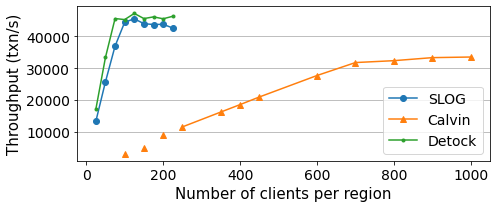

In [52]:
pivot_values = "throughput"
pivot_columns = "config_name"
pivot_index = "clients"
pivoted = throughput_df.pivot(index=pivot_index, columns=pivot_columns, values=pivot_values).sort_index()
pivoted["clients"] = pivoted.index
pivoted.rename(columns={"baseline.conf": "SLOG", "ddr_ts.conf": "Detock", "calvin.conf": "Calvin"}, inplace=True)
pivoted.columns.name = ''

ax = pivoted.plot(x="clients", xlabel="Number of clients per region", ylabel='Throughput (txn/s)', rot=0, legend=False, figsize=(7,3))

markers = ["o", "^", "."]
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

ax.legend(ax.get_lines(), pivoted.columns)

plt.grid(axis='y')
plt.tight_layout()
plt.savefig('output/tpcc-throughput.pdf')

# Latency

# By regions

In [44]:
index_sdf = get_index(spark, PREFIX)

latency_sdf = latency(spark, map(
        lambda r : r.prefix,
        index_sdf.select("prefix").collect()
    ))\
    .join(index_sdf, on="prefix")\
    .withColumn(
        "coordinator_region",
        F.when(F.col("config_name") == "calvin.conf", F.shiftright(col("coordinator"), 16))\
            .otherwise(F.col("coordinator") / 4)\
        .cast(T.IntegerType())
    )\
    .orderBy("clients")\
    .cache()

In [49]:
def plot_latency_per_region(sdf_dict):
    rows = 2
    cols = 4
    fig, ax = plt.subplots(rows, cols, figsize=(14, 6), sharex=True)
    regions = [
        "us-east-2",
        "us-east-1",
        "eu-west-1",
        "eu-west-2",
        "ap-northeast-1",
        "ap-northeast-2",
        "ap-southeast-1",
        "ap-southeast-2"
    ]
    for i in range(8):
        r, c = i // cols, i % cols
        ax[r, c].set_prop_cycle(cycler(linestyle=['-', '--', '-.']) + cycler(color='rkg'))
        for label, sdf in sdf_dict.items():
            plot_cdf(
                collect_col(sdf.where(col("coordinator_region") == i), "latency"),
                ax=ax[r, c],
                label=label if i == 0 else '_nolegend_',
            )

        ax[r, c].set_title(f"{regions[i]}")
        if r == rows - 1:
            ax[r, c].set_xlabel("latency (ms)")

    return fig, ax


22/05/09 11:44:14 WARN CacheManager: Asked to cache already cached data.
22/05/09 11:44:14 WARN CacheManager: Asked to cache already cached data.
22/05/09 11:44:14 WARN CacheManager: Asked to cache already cached data.


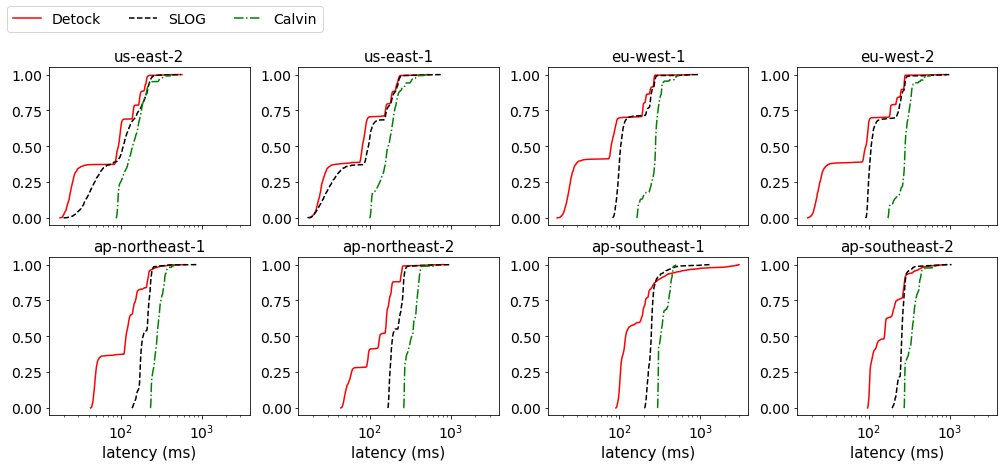

In [54]:
CLIENTS = 100

baseline_sdf = latency_sdf.where((col("config_name") == "baseline.conf") & (col("clients") == CLIENTS)).cache()
ddr_ts_sdf = latency_sdf.where((col("config_name") == "ddr_ts.conf") & (col("clients") == CLIENTS)).cache()
calvin_sdf = latency_sdf.where((col("config_name") == "calvin.conf") & (col("clients") == CLIENTS)).cache()

MH_FILTER = F.size("replicas") > 1

fig, _ = plot_latency_per_region({
    "Detock": ddr_ts_sdf.where(MH_FILTER),
    "SLOG": baseline_sdf.where(MH_FILTER),
    "Calvin": calvin_sdf,
})

fig.legend(bbox_to_anchor=(0, 1, 1, 0), loc='lower left', ncol=3)
fig.tight_layout()
fig.savefig('output/tpcc-cdf.pdf', bbox_inches='tight')
fig.savefig('output/tpcc-cdf.png', bbox_inches='tight')

# Throughput & Latency

In [45]:
IGNORE_CACHE = True

percentile_cols = [
    F.percentile_approx("latency", 0.5).alias("percentile_50"),
    F.percentile_approx("latency", 0.90).alias("percentile_90"),
    F.percentile_approx("latency", 0.95).alias("percentile_95"),
    F.percentile_approx("latency", 0.99).alias("percentile_99"),
]

baseline_pct = from_cache_or_compute(
    f'{PREFIX}/baseline_latency_pct.parquet',
    lambda: latency_sdf.where((col("config_name") == "baseline.conf"))\
        .groupBy("clients")\
        .agg(*percentile_cols)\
        .toPandas(),
    ignore_cache=IGNORE_CACHE,
)

ddr_ts_pct = from_cache_or_compute(
    f'{PREFIX}/ddr_ts_latency_pct.parquet',
    lambda: latency_sdf.where((col("config_name") == "ddr_ts.conf"))\
        .groupBy("clients")\
        .agg(*percentile_cols)\
        .toPandas(),
    ignore_cache=IGNORE_CACHE,
)

calvin_pct = from_cache_or_compute(
    f'{PREFIX}/calvin_latency_pct.parquet',
    lambda: latency_sdf.where((col("config_name") == "calvin.conf"))\
        .groupBy("clients")\
        .agg(*percentile_cols)\
        .toPandas(),
    ignore_cache=IGNORE_CACHE,
)

latency_pct_df = pd.concat([
    baseline_pct.assign(config_name="baseline.conf"),
    ddr_ts_pct.assign(config_name="ddr_ts.conf"),
    calvin_pct.assign(config_name="calvin.conf"),
])

throughput_latency_df = throughput_df[["config_name", "clients", "throughput"]].merge(
    latency_pct_df,
    on=["config_name", "clients"]
).sort_values("clients")
throughput_latency_df.sort_values(["config_name", "throughput"])

22/05/09 11:37:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: txn_id, coordinator, regions, partitions, sent_at, received_at
 Schema: txn_id, coordinator, replicas, partitions, sent_at, received_at
Expected: replicas but found: regions
CSV file: file:///home/ctring/data/detock/main/tpcc/calvin-clients900/client/0-6/transactions.csv
22/05/09 11:37:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: txn_id, coordinator, regions, partitions, sent_at, received_at
 Schema: txn_id, coordinator, replicas, partitions, sent_at, received_at
Expected: replicas but found: regions
CSV file: file:///home/ctring/data/detock/main/tpcc/calvin-clients900/client/0-0/transactions.csv
22/05/09 11:37:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: txn_id, coordinator, regions, partitions, sent_at, received_at
 Schema: txn_id, coordinator, replicas, partitions, sent_at, received_at
Expected: replicas but found: regions
CSV

Saved to: main/tpcc/baseline_latency_pct.parquet


Saved to: main/tpcc/ddr_ts_latency_pct.parquet


Saved to: main/tpcc/calvin_latency_pct.parquet


,config_name,clients,throughput,percentile_50,percentile_90,percentile_95,percentile_99
6,baseline.conf,25,13332.832903,6.926592,13.704448,33.294592,244.839680
7,baseline.conf,50,25738.203174,6.925568,18.560768,39.533824,247.274496
8,baseline.conf,75,36964.886942,7.260160,21.004544,43.144192,247.682816
5,baseline.conf,225,42651.733662,10.396928,120.921088,219.516672,472.055552
3,baseline.conf,175,43756.201999,9.761536,95.636736,189.590784,460.495616
4,baseline.conf,200,43827.042960,10.431744,115.304192,223.026176,480.750080
2,baseline.conf,150,44008.979185,9.381120,49.402112,147.922944,295.989504
0,baseline.conf,100,44471.197080,8.376576,26.342656,64.297216,250.554880
1,baseline.conf,125,45557.826789,9.056768,41.851648,97.043200,255.428096
9,calvin.conf,100,3154.444926,268.354048,376.293120,418.909952,483.382016


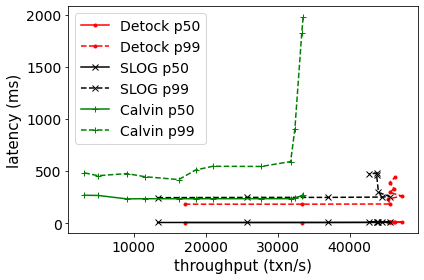

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
config_names = ["ddr_ts.conf", "baseline.conf", "calvin.conf"]
config_to_label = {
    'baseline.conf': 'SLOG',
    'ddr_only.conf': 'Detock (without Opportunistic Ordering)',
    'ddr_ts.conf': 'Detock',
    'calvin.conf': 'Calvin',
}

ax.set_prop_cycle((cycler(marker=['.', 'x', '+']) + cycler(color='rkg')) * cycler(linestyle=['-', '--']))

for config in config_names:
    label = config_to_label[config]
    throughput_latency_df[throughput_latency_df.config_name == config].plot(x="throughput", y="percentile_50", label=f"{label} p50", ax=ax)
    throughput_latency_df[throughput_latency_df.config_name == config].plot(x="throughput", y="percentile_99", label=f"{label} p99", ax=ax)

# ax.set_yscale('log')
ax.set_ylabel("latency (ms)")
ax.set_xlabel("throughput (txn/s)")
fig.tight_layout()
fig.savefig('output/tpcc-throughput-latency.pdf')
fig.savefig('output/tpcc-throughput-latency.png')